### 

### Reference

- Thieulot, C. (2014). ELEFANT: a user-friendly multipurpose geodynamics code. Solid Earth Discussions, 6(2), 1949-2096.

In [1]:
import underworld as uw
import underworld.function as fn
from underworld import UWGeodynamics as GEO
import numpy as np
import math

import os
import h5py   
import matplotlib.pyplot as plt

u = GEO.UnitRegistry

loaded rc file /opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/uwgeo-data/uwgeodynamicsrc


In [2]:
x_res,y_res = 50,50
fdir_output = "pp_Thieulot2014ELEFANT_StressBcs_Light_mid_changeBp"

gravity = 1.

Model = GEO.Model(elementRes=(x_res, y_res),
                  minCoord=(0. , 0.),
                  maxCoord=(1., 1.),
                  gravity=(0.0, -gravity))
Model.outputDir=fdir_output
#Model.minStrainRate = 1e-18 / u.second

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"


In [3]:
ma1_Shape1 = fn.input()[0] < 0.375
ma1_Shape2 = fn.input()[0] > 0.625
ma1_Shape  = ma1_Shape1 | ma1_Shape2 
ma2_Shape = (fn.input()[0] >= 0.375) & (fn.input()[0] <= 0.625)
 

ma1 = Model.add_material(name="Material 1", shape=ma1_Shape)
ma2 = Model.add_material(name="Material 2", shape=ma2_Shape) 


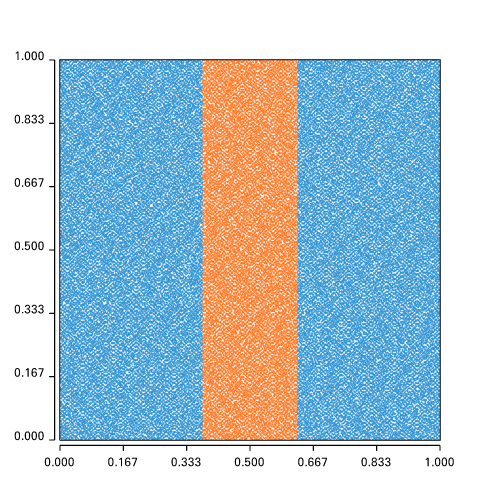

In [4]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelSetup.png")

In [5]:
ma1.density =  1.
ma2.density =  0.95


Model.minViscosity = 1.
Model.maxViscosity = 1e4

ma1.viscosity      = 1.
ma2.viscosity      = 1e4

Model.init_model()

/opt/venv/lib/python3.10/site-packages/underworld/UWGeodynamics/_model.py:1584: UserWarning: Skipping the steady state calculation: No diffusivity variable defined on Model
  warnings.warn("Skipping the steady state calculation: No diffusivity variable defined on Model")


In [6]:
0.95*0.25+0.75*1

0.9875

In [7]:
# tmp1 = uw.utils.Integral(fn=Model._densityFn*GEO.nd(gravity),mesh=Model.mesh, integrationType='volume')
# tmp2 = uw.utils.Integral(fn=1.,mesh=Model.mesh, integrationType='Surface',surfaceIndexSet=Model.bottom_wall)
# pbot = tmp1.evaluate()[0]/(tmp2.evaluate()[0])  # pbot = 1.0125000000001649

pbot = 0.95*0.25+0.75*1

In [8]:
Model.set_velocityBCs(left = [0.,0.],right=[0., 0.])
Model.set_stressBCs(bottom=[None,pbot])


Model.freeSurface = True

Model.solver.set_inner_method("mg")
Model.solver.set_penalty(1e-4)

	Global element size: 50x50
	Local offset of rank 0: 0x0
	Local range of rank 0: 50x50


In [9]:
Model.temperatureDot = Model._temperatureDot

Total_Time = 150
checkpoint_interval=checkpoint_interval = 10
dt = 0.1

#Model.run_for(nstep=1500, checkpoint_interval=10,dt=0.1)
Model.run_for(Total_Time, checkpoint_interval=checkpoint_interval,dt=dt)

Options:  -Q22_pc_type gkgdiag -force_correction True -ksp_type bsscr -pc_type none -ksp_k2_type NULL -rescale_equations False -remove_constant_pressure_null_space False -change_backsolve False -change_A11rhspresolve False -restore_K False -A11_ksp_type fgmres -A11_ksp_rtol 1e-05 -scr_ksp_type fgmres -scr_ksp_rtol 1e-05
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002604 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28659e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001412 secs 
  RHS V Solve:            = 0.004066 secs / 7 its
  Pressure Solve:         = 0.1054 secs / 27 its
  Final V Solve:          = 0.003942 secs / 7 its

  Total BSSCR Linear solve time: 0.128174 seconds

Linear solver (YRL463J4__system-execute), solution time 1.289189e-01 (secs)
Time Integration
	2nd order:     

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0811 [min] /    0.0811 [max] (secs)
Time Integration - 0.0811679 [min] / 0.0811679 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.665320e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:     7 Model Time: 255.7 day dt: 36.5 day (2023-06-03 05:46:55)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002709 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30702e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001411 secs 
  RHS V Solve:            = 0.003713 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002583 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32150e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.003656 secs / 7 its
  Pressure Solve:         = 0.1106 secs / 27 its
  Final V Solve:          = 0.004892 secs / 7 its

  Total BSSCR Linear solve time: 0.133851 seconds

Linear solver (YRL463J4__system-execute), solution time 1.341777e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0829 [min] /    0.0829 [max] (secs)
Time Integration - 0.0829606 [min] / 0.0829606 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.457864e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    20 Model Time: 2.0 year dt: 36.5 day (2023-06-03 05:47:12)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002612 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33660e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.003888 secs / 7 its
  Pressure Solve:         = 0.1033 secs / 27 its
  Final V Solve:          = 0.003772 secs / 7 its

  Total BSSCR Linear solve time: 0.125350 seconds

Linear solver (YRL463J4__system-execute), solution time 1.256631e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0848 [min] /    0.0848 [max] (secs)
Time Integration - 0.084839 [min] / 0.084839 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.498075e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    27 Model Time: 2.7 year dt: 36.5 day (2023-06-03 05:47:18)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002405 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24855e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001342 secs 
  RHS V Solve:            = 0.003439 secs /

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002621 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35502e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001455 secs 
  RHS V Solve:            = 0.003892 secs / 7 its
  Pressure Solve:         = 0.1108 secs / 28 its
  Final V Solve:          = 0.004336 secs / 7 its

  Total BSSCR Linear solve time: 0.133674 seconds

Linear solver (YRL463J4__system-execute), solution time 1.339775e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0811 [min] /    0.0811 [max] (secs)
Time Integration - 0.0811363 [min] / 0.0811363 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.516051e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    40 Model Time: 4.0 year dt: 36.5 day (2023-06-03 05:47:34)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002676 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36673e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00146 secs 
  RHS V Solve:            = 0.003869 secs / 7 its
  Pressure Solve:         = 0.1064 secs / 28 its
  Final V Solve:          = 0.003618 secs / 7 its

  Total BSSCR Linear solve time: 0.128509 seconds

Linear solver (YRL463J4__system-execute), solution time 1.288363e-01 (secs)
Time Integration
	2nd order:                 VSORUK

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0830 [min] /    0.0830 [max] (secs)
Time Integration - 0.0830089 [min] / 0.0830089 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.602600e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    47 Model Time: 4.7 year dt: 36.5 day (2023-06-03 05:47:40)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002598 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34102e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001457 secs 
  RHS V Solve:            = 0.003807 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002722 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38871e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001484 secs 
  RHS V Solve:            = 0.003633 secs / 7 its
  Pressure Solve:         = 0.1181 secs / 28 its
  Final V Solve:          = 0.004599 secs / 7 its

  Total BSSCR Linear solve time: 0.140982 seconds

Linear solver (YRL463J4__system-execute), solution time 1.413225e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0834 [min] /    0.0834 [max] (secs)
Time Integration - 0.0834848 [min] / 0.0834848 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.734646e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    60 Model Time: 6.0 year dt: 36.5 day (2023-06-03 05:47:57)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002644 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35639e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.003797 secs / 7 its
  Pressure Solve:         = 0.1045 secs / 28 its
  Final V Solve:          = 0.003674 secs / 7 its

  Total BSSCR Linear solve time: 0.126735 seconds

Linear solver (YRL463J4__system-execute), solution time 1.270692e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0859 [min] /    0.0859 [max] (secs)
Time Integration - 0.0859255 [min] / 0.0859255 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.592499e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    67 Model Time: 6.7 year dt: 36.5 day (2023-06-03 05:48:03)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003032 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23732e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001328 secs 
  RHS V Solve:            = 0.004028 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002706 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33063e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001426 secs 
  RHS V Solve:            = 0.003622 secs / 7 its
  Pressure Solve:         = 0.1105 secs / 27 its
  Final V Solve:          = 0.004522 secs / 7 its

  Total BSSCR Linear solve time: 0.133219 seconds

Linear solver (YRL463J4__system-execute), solution time 1.335729e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0846 [min] /    0.0846 [max] (secs)
Time Integration - 0.0846428 [min] / 0.0846428 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.966423e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    80 Model Time: 8.0 year dt: 36.5 day (2023-06-03 05:48:20)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002637 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46263e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001567 secs 
  RHS V Solve:            = 0.003915 secs / 7 its
  Pressure Solve:         = 0.1015 secs / 27 its
  Final V Solve:          = 0.003766 secs / 7 its

  Total BSSCR Linear solve time: 0.124314 seconds

Linear solver (YRL463J4__system-execute), solution time 1.246269e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.086953 [min] / 0.086953 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.636275e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:    87 Model Time: 8.7 year dt: 36.5 day (2023-06-03 05:48:26)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002697 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35294e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001448 secs 
  RHS V Solve:            = 0.003714 secs /

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002747 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32247e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001417 secs 
  RHS V Solve:            = 0.004005 secs / 7 its
  Pressure Solve:         = 0.11 secs / 27 its
  Final V Solve:          = 0.00445 secs / 7 its

  Total BSSCR Linear solve time: 0.133576 seconds

Linear solver (YRL463J4__system-execute), solution time 1.339418e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0881 [min] /    0.0881 [max] (secs)
Time Integration - 0.0881844 [min] / 0.0881844 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.587979e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   100 Model Time: 10.0 year dt: 36.5 day (2023-06-03 05:48:43)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002670 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38330e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.004189 secs / 7 its
  Pressure Solve:         = 0.1089 secs / 27 its
  Final V Solve:          = 0.00386 secs / 7 its

  Total BSSCR Linear solve time: 0.132279 seconds

Linear solver (YRL463J4__system-execute), solution time 1.326451e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0898 [min] /    0.0898 [max] (secs)
Time Integration - 0.0898982 [min] / 0.0898982 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.668515e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   107 Model Time: 10.7 year dt: 36.5 day (2023-06-03 05:48:49)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002740 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36618e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001463 secs 
  RHS V Solve:            = 0.004217 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002613 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33932e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001434 secs 
  RHS V Solve:            = 0.004305 secs / 8 its
  Pressure Solve:         = 0.1117 secs / 28 its
  Final V Solve:          = 0.004585 secs / 7 its

  Total BSSCR Linear solve time: 0.135386 seconds

Linear solver (YRL463J4__system-execute), solution time 1.357398e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0844 [min] /    0.0844 [max] (secs)
Time Integration - 0.084423 [min] / 0.084423 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.682021e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   120 Model Time: 12.0 year dt: 36.5 day (2023-06-03 05:49:07)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002480 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24354e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001343 secs 
  RHS V Solve:            = 0.004302 secs / 8 its
  Pressure Solve:         = 0.107 secs / 28 its
  Final V Solve:          = 0.003629 secs / 7 its

  Total BSSCR Linear solve time: 0.128891 seconds

Linear solver (YRL463J4__system-execute), solution time 1.292769e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0849 [min] /    0.0849 [max] (secs)
Time Integration - 0.084982 [min] / 0.084982 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.682224e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   127 Model Time: 12.7 year dt: 36.5 day (2023-06-03 05:49:13)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002684 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42315e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.004506 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002759 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34258e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001443 secs 
  RHS V Solve:            = 0.004391 secs / 8 its
  Pressure Solve:         = 0.1245 secs / 27 its
  Final V Solve:          = 0.004601 secs / 7 its

  Total BSSCR Linear solve time: 0.148711 seconds

Linear solver (YRL463J4__system-execute), solution time 1.490612e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0859 [min] /    0.0859 [max] (secs)
Time Integration - 0.0859416 [min] / 0.0859416 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.344763e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   140 Model Time: 14.0 year dt: 36.5 day (2023-06-03 05:49:30)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002579 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28603e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0014 secs 
  RHS V Solve:            = 0.004434 secs / 8 its
  Pressure Solve:         = 0.104 secs / 27 its
  Final V Solve:          = 0.00372 secs / 7 its

  Total BSSCR Linear solve time: 0.126596 seconds

Linear solver (YRL463J4__system-execute), solution time 1.269562e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0868 [min] /    0.0868 [max] (secs)
Time Integration - 0.0868529 [min] / 0.0868529 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.438648e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   147 Model Time: 14.7 year dt: 36.5 day (2023-06-03 05:49:36)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002581 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29100e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001391 secs 
  RHS V Solve:            = 0.004537 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002660 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38686e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.004109 secs / 7 its
  Pressure Solve:         = 0.1337 secs / 28 its
  Final V Solve:          = 0.004733 secs / 7 its

  Total BSSCR Linear solve time: 0.157574 seconds

Linear solver (YRL463J4__system-execute), solution time 1.579650e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0869 [min] /    0.0869 [max] (secs)
Time Integration - 0.0869036 [min] / 0.0869036 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.487455e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   160 Model Time: 16.0 year dt: 36.5 day (2023-06-03 05:49:53)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002565 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25436e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001351 secs 
  RHS V Solve:            = 0.00407 secs / 7 its
  Pressure Solve:         = 0.1089 secs / 28 its
  Final V Solve:          = 0.00355 secs / 7 its

  Total BSSCR Linear solve time: 0.130762 seconds

Linear solver (YRL463J4__system-execute), solution time 1.311085e-01 (secs)
Time Integration
	2nd order:                 VSORUK

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0880 [min] /    0.0880 [max] (secs)
Time Integration - 0.0880339 [min] / 0.0880339 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.631970e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   167 Model Time: 16.7 year dt: 36.5 day (2023-06-03 05:49:59)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003157 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39786e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001503 secs 
  RHS V Solve:            = 0.004348 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002663 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33803e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001437 secs 
  RHS V Solve:            = 0.004097 secs / 7 its
  Pressure Solve:         = 0.1269 secs / 28 its
  Final V Solve:          = 0.004788 secs / 7 its

  Total BSSCR Linear solve time: 0.150677 seconds

Linear solver (YRL463J4__system-execute), solution time 1.510368e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0864 [min] /    0.0864 [max] (secs)
Time Integration - 0.0864537 [min] / 0.0864537 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.788671e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   180 Model Time: 18.0 year dt: 36.5 day (2023-06-03 05:50:17)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002479 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29037e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001388 secs 
  RHS V Solve:            = 0.003996 secs / 7 its
  Pressure Solve:         = 0.108 secs / 28 its
  Final V Solve:          = 0.00371 secs / 7 its

  Total BSSCR Linear solve time: 0.129681 seconds

Linear solver (YRL463J4__system-execute), solution time 1.300384e-01 (secs)
Time Integration
	2nd order:                 VSORUK

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0879 [min] /    0.0879 [max] (secs)
Time Integration - 0.0879742 [min] / 0.0879742 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.650612e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   187 Model Time: 18.7 year dt: 36.5 day (2023-06-03 05:50:23)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002757 seconds

SROpGenerator_SimpleFinestLevel: time = 1.59615e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001709 secs 
  RHS V Solve:            = 0.003895 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003079 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31381e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001414 secs 
  RHS V Solve:            = 0.004059 secs / 7 its
  Pressure Solve:         = 0.1301 secs / 28 its
  Final V Solve:          = 0.004489 secs / 7 its

  Total BSSCR Linear solve time: 0.154190 seconds

Linear solver (YRL463J4__system-execute), solution time 1.546511e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0871 [min] /    0.0871 [max] (secs)
Time Integration - 0.087169 [min] / 0.087169 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.663957e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   200 Model Time: 20.0 year dt: 36.5 day (2023-06-03 05:50:40)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002465 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22919e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001324 secs 
  RHS V Solve:            = 0.00397 secs / 7 its
  Pressure Solve:         = 0.1135 secs / 28 its
  Final V Solve:          = 0.003803 secs / 7 its

  Total BSSCR Linear solve time: 0.135537 seconds

Linear solver (YRL463J4__system-execute), solution time 1.359393e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0888 [min] /    0.0888 [max] (secs)
Time Integration - 0.0888674 [min] / 0.0888674 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.664299e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   207 Model Time: 20.7 year dt: 36.5 day (2023-06-03 05:50:47)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002759 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38313e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001492 secs 
  RHS V Solve:            = 0.00394 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002765 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37977e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001485 secs 
  RHS V Solve:            = 0.004036 secs / 7 its
  Pressure Solve:         = 0.1315 secs / 28 its
  Final V Solve:          = 0.004719 secs / 7 its

  Total BSSCR Linear solve time: 0.155521 seconds

Linear solver (YRL463J4__system-execute), solution time 1.559318e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0879 [min] /    0.0879 [max] (secs)
Time Integration - 0.0878977 [min] / 0.0878977 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.658035e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   220 Model Time: 22.0 year dt: 36.5 day (2023-06-03 05:51:04)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002794 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38901e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.003949 secs / 7 its
  Pressure Solve:         = 0.1078 secs / 28 its
  Final V Solve:          = 0.003869 secs / 7 its

  Total BSSCR Linear solve time: 0.130915 seconds

Linear solver (YRL463J4__system-execute), solution time 1.313392e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0874 [min] /    0.0874 [max] (secs)
Time Integration - 0.0874072 [min] / 0.0874072 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.870430e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   227 Model Time: 22.7 year dt: 36.5 day (2023-06-03 05:51:11)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002496 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24233e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001334 secs 
  RHS V Solve:            = 0.004167 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002759 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38284e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001503 secs 
  RHS V Solve:            = 0.00499 secs / 7 its
  Pressure Solve:         = 0.1349 secs / 28 its
  Final V Solve:          = 0.004701 secs / 7 its

  Total BSSCR Linear solve time: 0.160088 seconds

Linear solver (YRL463J4__system-execute), solution time 1.604848e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0879 [min] /    0.0879 [max] (secs)
Time Integration - 0.0879703 [min] / 0.0879703 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.359885e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   240 Model Time: 24.0 year dt: 36.5 day (2023-06-03 05:51:28)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002677 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34981e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00145 secs 
  RHS V Solve:            = 0.003899 secs / 7 its
  Pressure Solve:         = 0.1052 secs / 27 its
  Final V Solve:          = 0.003768 secs / 7 its

  Total BSSCR Linear solve time: 0.127539 seconds

Linear solver (YRL463J4__system-execute), solution time 1.279532e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0886 [min] /    0.0886 [max] (secs)
Time Integration - 0.088591 [min] / 0.088591 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.065476e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   247 Model Time: 24.7 year dt: 36.5 day (2023-06-03 05:51:35)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002771 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23580e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001337 secs 
  RHS V Solve:            = 0.00404 secs /

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002590 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30516e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001404 secs 
  RHS V Solve:            = 0.004058 secs / 7 its
  Pressure Solve:         = 0.1336 secs / 28 its
  Final V Solve:          = 0.004815 secs / 7 its

  Total BSSCR Linear solve time: 0.157200 seconds

Linear solver (YRL463J4__system-execute), solution time 1.575812e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.088707 [min] / 0.088707 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.859152e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   260 Model Time: 26.0 year dt: 36.5 day (2023-06-03 05:51:52)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002885 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41007e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001523 secs 
  RHS V Solve:            = 0.003956 secs / 7 its
  Pressure Solve:         = 0.1146 secs / 28 its
  Final V Solve:          = 0.00409 secs / 7 its

  Total BSSCR Linear solve time: 0.138041 seconds

Linear solver (YRL463J4__system-execute), solution time 1.384636e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0879 [min] /    0.0879 [max] (secs)
Time Integration - 0.0879952 [min] / 0.0879952 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.222245e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   267 Model Time: 26.7 year dt: 36.5 day (2023-06-03 05:51:58)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002702 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39886e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.004036 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002720 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43779e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001567 secs 
  RHS V Solve:            = 0.004893 secs / 7 its
  Pressure Solve:         = 0.1138 secs / 27 its
  Final V Solve:          = 0.004006 secs / 7 its

  Total BSSCR Linear solve time: 0.138946 seconds

Linear solver (YRL463J4__system-execute), solution time 1.393581e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.1064 [min] /    0.1064 [max] (secs)
Time Integration - 0.106411 [min] / 0.106411 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.827042e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   280 Model Time: 28.0 year dt: 36.5 day (2023-06-03 05:52:16)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002838 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37531e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001488 secs 
  RHS V Solve:            = 0.00408 secs / 7 its
  Pressure Solve:         = 0.1036 secs / 27 its
  Final V Solve:          = 0.003764 secs / 7 its

  Total BSSCR Linear solve time: 0.126995 seconds

Linear solver (YRL463J4__system-execute), solution time 1.274181e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0889 [min] /    0.0889 [max] (secs)
Time Integration - 0.0889458 [min] / 0.0889458 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.369855e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   287 Model Time: 28.7 year dt: 36.5 day (2023-06-03 05:52:22)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002645 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23324e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001324 secs 
  RHS V Solve:            = 0.004017 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002683 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30526e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001398 secs 
  RHS V Solve:            = 0.004268 secs / 7 its
  Pressure Solve:         = 0.1359 secs / 28 its
  Final V Solve:          = 0.004728 secs / 7 its

  Total BSSCR Linear solve time: 0.159089 seconds

Linear solver (YRL463J4__system-execute), solution time 1.594993e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0885 [min] /    0.0885 [max] (secs)
Time Integration - 0.0885085 [min] / 0.0885085 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.236058e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   300 Model Time: 30.0 year dt: 36.5 day (2023-06-03 05:52:39)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002850 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43809e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001566 secs 
  RHS V Solve:            = 0.00404 secs / 7 its
  Pressure Solve:         = 0.1142 secs / 28 its
  Final V Solve:          = 0.003879 secs / 7 its

  Total BSSCR Linear solve time: 0.137601 seconds

Linear solver (YRL463J4__system-execute), solution time 1.380211e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0889 [min] /    0.0889 [max] (secs)
Time Integration - 0.0889483 [min] / 0.0889483 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.797319e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   307 Model Time: 30.7 year dt: 36.5 day (2023-06-03 05:52:46)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002605 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28223e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001388 secs 
  RHS V Solve:            = 0.00396 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002655 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31565e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001423 secs 
  RHS V Solve:            = 0.003908 secs / 7 its
  Pressure Solve:         = 0.129 secs / 27 its
  Final V Solve:          = 0.004506 secs / 7 its

  Total BSSCR Linear solve time: 0.152317 seconds

Linear solver (YRL463J4__system-execute), solution time 1.527816e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887453 [min] / 0.0887453 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.761894e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   320 Model Time: 32.0 year dt: 36.5 day (2023-06-03 05:53:03)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002876 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35003e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001469 secs 
  RHS V Solve:            = 0.004096 secs / 7 its
  Pressure Solve:         = 0.1036 secs / 27 its
  Final V Solve:          = 0.003904 secs / 7 its

  Total BSSCR Linear solve time: 0.126797 seconds

Linear solver (YRL463J4__system-execute), solution time 1.271884e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0886 [min] /    0.0886 [max] (secs)
Time Integration - 0.0886139 [min] / 0.0886139 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.777248e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   327 Model Time: 32.7 year dt: 36.5 day (2023-06-03 05:53:09)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004788 seconds

SROpGenerator_SimpleFinestLevel: time = 2.44437e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002618 secs 
  RHS V Solve:            = 0.006934 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004903 seconds

SROpGenerator_SimpleFinestLevel: time = 2.63544e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002788 secs 
  RHS V Solve:            = 0.004613 secs / 7 its
  Pressure Solve:         = 0.1335 secs / 28 its
  Final V Solve:          = 0.004802 secs / 7 its

  Total BSSCR Linear solve time: 0.165603 seconds

Linear solver (YRL463J4__system-execute), solution time 1.660833e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0897 [min] /    0.0897 [max] (secs)
Time Integration - 0.0897427 [min] / 0.0897427 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.106687e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   340 Model Time: 34.0 year dt: 36.5 day (2023-06-03 05:53:27)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002607 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30259e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001406 secs 
  RHS V Solve:            = 0.004098 secs / 7 its
  Pressure Solve:         = 0.11 secs / 28 its
  Final V Solve:          = 0.003833 secs / 7 its

  Total BSSCR Linear solve time: 0.132815 seconds

Linear solver (YRL463J4__system-execute), solution time 1.332697e-01 (secs)
Time Integration
	2nd order:                 VSORUK

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0893 [min] /    0.0893 [max] (secs)
Time Integration - 0.0893778 [min] / 0.0893778 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.738741e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   347 Model Time: 34.7 year dt: 36.5 day (2023-06-03 05:53:33)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002869 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46485e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.004061 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002747 seconds

SROpGenerator_SimpleFinestLevel: time = 1.48383e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001619 secs 
  RHS V Solve:            = 0.004651 secs / 7 its
  Pressure Solve:         = 0.1289 secs / 28 its
  Final V Solve:          = 0.004677 secs / 7 its

  Total BSSCR Linear solve time: 0.154155 seconds

Linear solver (YRL463J4__system-execute), solution time 1.546066e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0894917 [min] / 0.0894917 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.755881e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   360 Model Time: 36.0 year dt: 36.5 day (2023-06-03 05:53:51)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002790 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36612e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001499 secs 
  RHS V Solve:            = 0.004295 secs / 7 its
  Pressure Solve:         = 0.1112 secs / 27 its
  Final V Solve:          = 0.00393 secs / 7 its

  Total BSSCR Linear solve time: 0.135059 seconds

Linear solver (YRL463J4__system-execute), solution time 1.355426e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0894 [min] /    0.0894 [max] (secs)
Time Integration - 0.0894719 [min] / 0.0894719 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.772488e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   367 Model Time: 36.7 year dt: 36.5 day (2023-06-03 05:53:57)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002555 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27649e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001377 secs 
  RHS V Solve:            = 0.004275 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002796 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37492e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001493 secs 
  RHS V Solve:            = 0.004192 secs / 7 its
  Pressure Solve:         = 0.1277 secs / 27 its
  Final V Solve:          = 0.004453 secs / 7 its

  Total BSSCR Linear solve time: 0.151983 seconds

Linear solver (YRL463J4__system-execute), solution time 1.524321e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0893 [min] /    0.0893 [max] (secs)
Time Integration - 0.0893205 [min] / 0.0893205 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.783106e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   380 Model Time: 38.0 year dt: 36.5 day (2023-06-03 05:54:14)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004502 seconds

SROpGenerator_SimpleFinestLevel: time = 2.37440e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002531 secs 
  RHS V Solve:            = 0.005919 secs / 7 its
  Pressure Solve:         = 0.1132 secs / 27 its
  Final V Solve:          = 0.003713 secs / 7 its

  Total B

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0890 [min] /    0.0890 [max] (secs)
Time Integration - 0.0890458 [min] / 0.0890458 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.795895e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   387 Model Time: 38.7 year dt: 36.5 day (2023-06-03 05:54:21)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002681 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22192e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001317 secs 
  RHS V Solve:            = 0.003941 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002663 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34326e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001447 secs 
  RHS V Solve:            = 0.003826 secs / 7 its
  Pressure Solve:         = 0.1264 secs / 27 its
  Final V Solve:          = 0.004842 secs / 7 its

  Total BSSCR Linear solve time: 0.149969 seconds

Linear solver (YRL463J4__system-execute), solution time 1.503871e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904874 [min] / 0.0904874 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.938718e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   400 Model Time: 40.0 year dt: 36.5 day (2023-06-03 05:54:38)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002827 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34132e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001443 secs 
  RHS V Solve:            = 0.004113 secs / 7 its
  Pressure Solve:         = 0.1053 secs / 27 its
  Final V Solve:          = 0.003856 secs / 7 its

  Total BSSCR Linear solve time: 0.128354 seconds

Linear solver (YRL463J4__system-execute), solution time 1.288324e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0895 [min] /    0.0895 [max] (secs)
Time Integration - 0.0895832 [min] / 0.0895832 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.799108e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   407 Model Time: 40.7 year dt: 36.5 day (2023-06-03 05:54:45)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002774 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33491e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001436 secs 
  RHS V Solve:            = 0.004035 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002575 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28736e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001381 secs 
  RHS V Solve:            = 0.004317 secs / 7 its
  Pressure Solve:         = 0.1353 secs / 28 its
  Final V Solve:          = 0.004641 secs / 7 its

  Total BSSCR Linear solve time: 0.158603 seconds

Linear solver (YRL463J4__system-execute), solution time 1.590790e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948446 [min] / 0.0948446 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.819700e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   420 Model Time: 42.0 year dt: 36.5 day (2023-06-03 05:55:02)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002807 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45653e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001574 secs 
  RHS V Solve:            = 0.004044 secs / 7 its
  Pressure Solve:         = 0.1154 secs

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907581 [min] / 0.0907581 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.820606e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   427 Model Time: 42.7 year dt: 36.5 day (2023-06-03 05:55:09)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002705 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37397e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001474 secs 
  RHS V Solve:            = 0.004201 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002615 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28643e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001387 secs 
  RHS V Solve:            = 0.004068 secs / 7 its
  Pressure Solve:         = 0.1289 secs / 28 its
  Final V Solve:          = 0.004556 secs / 7 its

  Total BSSCR Linear solve time: 0.152380 seconds

Linear solver (YRL463J4__system-execute), solution time 1.528477e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.0902743 [min] / 0.0902743 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.827671e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   440 Model Time: 44.0 year dt: 36.5 day (2023-06-03 05:55:26)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004380 seconds

SROpGenerator_SimpleFinestLevel: time = 2.38428e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002549 secs 
  RHS V Solve:            = 0.005615 secs / 7 its
  Pressure Solve:         = 0.1128 secs / 28 its
  Final V Solve:          = 0.003855 secs / 7 its

  Total BSSCR Linear solve time: 0.144788 seconds

Linear solver (YRL463J4__system-execute), solution time 1.453317e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.090748 [min] / 0.090748 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.920733e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   447 Model Time: 44.7 year dt: 36.5 day (2023-06-03 05:55:33)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002582 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26882e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001373 secs 
  RHS V Solve:            = 0.004185 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002799 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44835e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.004083 secs / 7 its
  Pressure Solve:         = 0.1367 secs / 28 its
  Final V Solve:          = 0.00468 secs / 7 its

  Total BSSCR Linear solve time: 0.161182 seconds

Linear solver (YRL463J4__system-execute), solution time 1.616557e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0923 [min] /    0.0923 [max] (secs)
Time Integration - 0.0922945 [min] / 0.0922945 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.757432e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   460 Model Time: 46.0 year dt: 36.5 day (2023-06-03 05:55:51)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002835 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44288e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001554 secs 
  RHS V Solve:            = 0.003977 secs / 7 its
  Pressure Solve:         = 0.114 secs / 28 its
  Final V Solve:          = 0.003917 secs / 7 its

  Total BSSCR Linear solve time: 0.137417 seconds

Linear solver (YRL463J4__system-execute), solution time 1.378975e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909696 [min] / 0.0909696 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.876918e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   467 Model Time: 46.7 year dt: 36.5 day (2023-06-03 05:55:57)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002616 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29613e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001401 secs 
  RHS V Solve:            = 0.003969 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002641 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41794e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001524 secs 
  RHS V Solve:            = 0.00413 secs / 7 its
  Pressure Solve:         = 0.1344 secs / 28 its
  Final V Solve:          = 0.004741 secs / 7 its

  Total BSSCR Linear solve time: 0.158050 seconds

Linear solver (YRL463J4__system-execute), solution time 1.584914e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0904 [min] /    0.0904 [max] (secs)
Time Integration - 0.0904824 [min] / 0.0904824 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.379195e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   480 Model Time: 48.0 year dt: 36.5 day (2023-06-03 05:56:15)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002534 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31704e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001417 secs 
  RHS V Solve:            = 0.004202 secs / 7 its
  Pressure Solve:         = 0.1111 secs / 28 its
  Final V Solve:          = 0.003753 secs / 7 its

  Total BSSCR Linear solve time: 0.133669 seconds

Linear solver (YRL463J4__system-execute), solution time 1.341116e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0902 [min] /    0.0902 [max] (secs)
Time Integration - 0.090274 [min] / 0.090274 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.803604e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   487 Model Time: 48.7 year dt: 36.5 day (2023-06-03 05:56:21)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002560 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25499e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00138 secs 
  RHS V Solve:            = 0.004028 secs /

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002689 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24529e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00134 secs 
  RHS V Solve:            = 0.004915 secs / 7 its
  Pressure Solve:         = 0.1356 secs / 28 its
  Final V Solve:          = 0.004614 secs / 7 its

  Total BSSCR Linear solve time: 0.160008 seconds

Linear solver (YRL463J4__system-execute), solution time 1.604826e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907165 [min] / 0.0907165 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.673536e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   500 Model Time: 50.0 year dt: 36.5 day (2023-06-03 05:56:39)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002742 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32950e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001436 secs 
  RHS V Solve:            = 0.003951 secs / 7 its
  Pressure Solve:         = 0.1086 secs / 28 its
  Final V Solve:          = 0.003739 secs / 7 its

  Total BSSCR Linear solve time: 0.131116 seconds

Linear solver (YRL463J4__system-execute), solution time 1.315774e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901511 [min] / 0.0901511 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.920885e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   507 Model Time: 50.7 year dt: 36.5 day (2023-06-03 05:56:45)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002705 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28393e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001378 secs 
  RHS V Solve:            = 0.00407 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004640 seconds

SROpGenerator_SimpleFinestLevel: time = 2.45902e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002615 secs 
  RHS V Solve:            = 0.005569 secs / 7 its
  Pressure Solve:         = 0.1344 secs / 28 its
  Final V Solve:          = 0.004632 secs / 7 its

  Total BSSCR Linear solve time: 0.167191 seconds

Linear solver (YRL463J4__system-execute), solution time 1.676836e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901548 [min] / 0.0901548 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.633315e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   520 Model Time: 52.0 year dt: 36.5 day (2023-06-03 05:57:03)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002818 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41385e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.003984 secs / 7 its
  Pressure Solve:         = 0.1095 secs / 28 its
  Final V Solve:          = 0.003749 secs / 7 its

  Total BSSCR Linear solve time: 0.132665 seconds

Linear solver (YRL463J4__system-execute), solution time 1.331633e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919569 [min] / 0.0919569 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.155495e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   527 Model Time: 52.7 year dt: 36.5 day (2023-06-03 05:57:09)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002595 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27001e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001365 secs 
  RHS V Solve:            = 0.004262 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002811 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41698e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001536 secs 
  RHS V Solve:            = 0.003895 secs / 7 its
  Pressure Solve:         = 0.1362 secs / 28 its
  Final V Solve:          = 0.004774 secs / 7 its

  Total BSSCR Linear solve time: 0.159909 seconds

Linear solver (YRL463J4__system-execute), solution time 1.604116e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0908 [min] /    0.0908 [max] (secs)
Time Integration - 0.0908557 [min] / 0.0908557 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.888234e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   540 Model Time: 54.0 year dt: 36.5 day (2023-06-03 05:57:27)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002753 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43569e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00156 secs 
  RHS V Solve:            = 0.004149 secs / 7 its
  Pressure Solve:         = 0.1164 secs / 28 its
  Final V Solve:          = 0.003931 secs / 7 its

  Total BSSCR Linear solve time: 0.140364 seconds

Linear solver (YRL463J4__system-execute), solution time 1.408509e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917016 [min] / 0.0917016 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.124541e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   547 Model Time: 54.7 year dt: 36.5 day (2023-06-03 05:57:34)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002466 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001336 secs 
  RHS V Solve:            = 0.004019 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002739 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38913e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0015 secs 
  RHS V Solve:            = 0.00484 secs / 7 its
  Pressure Solve:         = 0.1391 secs / 28 its
  Final V Solve:          = 0.004869 secs / 7 its

  Total BSSCR Linear solve time: 0.164698 seconds

Linear solver (YRL463J4__system-execute), solution time 1.651666e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912053 [min] / 0.0912053 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.743790e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   560 Model Time: 56.0 year dt: 36.5 day (2023-06-03 05:57:51)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002801 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39137e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001502 secs 
  RHS V Solve:            = 0.003935 secs / 7 its
  Pressure Solve:         = 0.1106 secs / 28 its
  Final V Solve:          = 0.00385 secs / 7 its

  Total BSSCR Linear solve time: 0.133876 seconds

Linear solver (YRL463J4__system-execute), solution time 1.344041e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912736 [min] / 0.0912736 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.941327e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   567 Model Time: 56.7 year dt: 36.5 day (2023-06-03 05:57:58)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002645 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28484e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001389 secs 
  RHS V Solve:            = 0.00423 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002549 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28918e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001392 secs 
  RHS V Solve:            = 0.0039 secs / 7 its
  Pressure Solve:         = 0.1333 secs / 28 its
  Final V Solve:          = 0.004893 secs / 7 its

  Total BSSCR Linear solve time: 0.156788 seconds

Linear solver (YRL463J4__system-execute), solution time 1.572660e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0898 [min] /    0.0898 [max] (secs)
Time Integration - 0.0898668 [min] / 0.0898668 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.772543e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   580 Model Time: 58.0 year dt: 36.5 day (2023-06-03 05:58:16)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002774 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43880e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001555 secs 
  RHS V Solve:            = 0.004067 secs / 7 its
  Pressure Solve:         = 0.1155 secs

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0901842 [min] / 0.0901842 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.807697e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   587 Model Time: 58.7 year dt: 36.5 day (2023-06-03 05:58:22)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002756 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41005e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00152 secs 
  RHS V Solve:            = 0.00421 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002894 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41727e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.004136 secs / 7 its
  Pressure Solve:         = 0.1347 secs / 28 its
  Final V Solve:          = 0.004726 secs / 7 its

  Total BSSCR Linear solve time: 0.159374 seconds

Linear solver (YRL463J4__system-execute), solution time 1.598456e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0907 [min] /    0.0907 [max] (secs)
Time Integration - 0.0907807 [min] / 0.0907807 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.214120e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   600 Model Time: 60.0 year dt: 36.5 day (2023-06-03 05:58:40)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002873 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40826e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001531 secs 
  RHS V Solve:            = 0.004232 secs / 7 its
  Pressure Solve:         = 0.1183 secs / 28 its
  Final V Solve:          = 0.004091 secs / 7 its

  Total BSSCR Linear solve time: 0.142123 seconds

Linear solver (YRL463J4__system-execute), solution time 1.426122e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910016 [min] / 0.0910016 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.771286e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   607 Model Time: 60.7 year dt: 36.5 day (2023-06-03 05:58:46)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002604 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33620e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.004007 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002623 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32480e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.004107 secs / 7 its
  Pressure Solve:         = 0.1365 secs / 28 its
  Final V Solve:          = 0.004645 secs / 7 its

  Total BSSCR Linear solve time: 0.159980 seconds

Linear solver (YRL463J4__system-execute), solution time 1.604254e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.0915073 [min] / 0.0915073 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.881166e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   620 Model Time: 62.0 year dt: 36.5 day (2023-06-03 05:59:04)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002873 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38744e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.004022 secs / 7 its
  Pressure Solve:         = 0.1174 secs / 28 its
  Final V Solve:          = 0.003968 secs / 7 its

  Total BSSCR Linear solve time: 0.140922 seconds

Linear solver (YRL463J4__system-execute), solution time 1.414097e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917158 [min] / 0.0917158 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.836406e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   627 Model Time: 62.7 year dt: 36.5 day (2023-06-03 05:59:10)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31487e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001417 secs 
  RHS V Solve:            = 0.004181 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002559 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26213e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001382 secs 
  RHS V Solve:            = 0.004036 secs / 7 its
  Pressure Solve:         = 0.1377 secs / 28 its
  Final V Solve:          = 0.004735 secs / 7 its

  Total BSSCR Linear solve time: 0.161013 seconds

Linear solver (YRL463J4__system-execute), solution time 1.615108e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0947 [min] /    0.0947 [max] (secs)
Time Integration - 0.0947232 [min] / 0.0947232 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.838723e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   640 Model Time: 64.0 year dt: 36.5 day (2023-06-03 05:59:28)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002787 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33682e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001445 secs 
  RHS V Solve:            = 0.004019 secs / 7 its
  Pressure Solve:         = 0.1157 secs / 28 its
  Final V Solve:          = 0.003978 secs / 7 its

  Total BSSCR Linear solve time: 0.138882 seconds

Linear solver (YRL463J4__system-execute), solution time 1.393863e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.0915296 [min] / 0.0915296 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.872320e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   647 Model Time: 64.7 year dt: 36.5 day (2023-06-03 05:59:35)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002614 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31004e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.004142 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002625 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32728e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001475 secs 
  RHS V Solve:            = 0.004745 secs / 8 its
  Pressure Solve:         = 0.1368 secs / 28 its
  Final V Solve:          = 0.004902 secs / 7 its

  Total BSSCR Linear solve time: 0.161679 seconds

Linear solver (YRL463J4__system-execute), solution time 1.621799e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911864 [min] / 0.0911864 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.265245e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   660 Model Time: 66.0 year dt: 36.5 day (2023-06-03 05:59:52)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002822 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41694e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001541 secs 
  RHS V Solve:            = 0.004721 secs / 8 its
  Pressure Solve:         = 0.1168 secs / 28 its
  Final V Solve:          = 0.004098 secs / 7 its

  Total B

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0909 [min] /    0.0909 [max] (secs)
Time Integration - 0.0909132 [min] / 0.0909132 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.703347e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   667 Model Time: 66.7 year dt: 36.5 day (2023-06-03 05:59:59)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002781 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33346e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001451 secs 
  RHS V Solve:            = 0.004601 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002717 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41672e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001548 secs 
  RHS V Solve:            = 0.004871 secs / 8 its
  Pressure Solve:         = 0.1409 secs / 28 its
  Final V Solve:          = 0.004802 secs / 7 its

  Total BSSCR Linear solve time: 0.165746 seconds

Linear solver (YRL463J4__system-execute), solution time 1.662419e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912442 [min] / 0.0912442 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.286699e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   680 Model Time: 68.0 year dt: 36.5 day (2023-06-03 06:00:17)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002862 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43497e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001549 secs 
  RHS V Solve:            = 0.004901 secs / 8 its
  Pressure Solve:         = 0.1163 secs / 28 its
  Final V Solve:          = 0.004055 secs / 7 its

  Total BSSCR Linear solve time: 0.141038 seconds

Linear solver (YRL463J4__system-execute), solution time 1.415574e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.0911123 [min] / 0.0911123 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.919549e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   687 Model Time: 68.7 year dt: 36.5 day (2023-06-03 06:00:23)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002754 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31583e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001445 secs 
  RHS V Solve:            = 0.004524 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004811 seconds

SROpGenerator_SimpleFinestLevel: time = 2.52694e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002686 secs 
  RHS V Solve:            = 0.007039 secs / 8 its
  Pressure Solve:         = 0.1318 secs / 28 its
  Final V Solve:          = 0.004882 secs / 7 its

  Total BSSCR Linear solve time: 0.168089 seconds

Linear solver (YRL463J4__system-execute), solution time 1.687245e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.0935069 [min] / 0.0935069 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.932442e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   700 Model Time: 70.0 year dt: 36.5 day (2023-06-03 06:00:42)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002789 seconds

SROpGenerator_SimpleFinestLevel: time = 1.45628e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001583 secs 
  RHS V Solve:            = 0.004763 secs / 8 its
  Pressure Solve:         = 0.1174 secs / 28 its
  Final V Solve:          = 0.003962 secs / 7 its

  Total BSSCR Linear solve time: 0.142181 seconds

Linear solver (YRL463J4__system-execute), solution time 1.427099e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910199 [min] / 0.0910199 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.882325e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   707 Model Time: 70.7 year dt: 36.5 day (2023-06-03 06:00:48)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002703 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35582e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001459 secs 
  RHS V Solve:            = 0.004838 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002563 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25492e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001345 secs 
  RHS V Solve:            = 0.005595 secs / 8 its
  Pressure Solve:         = 0.1349 secs / 28 its
  Final V Solve:          = 0.004722 secs / 7 its

  Total BSSCR Linear solve time: 0.159451 seconds

Linear solver (YRL463J4__system-execute), solution time 1.598957e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917105 [min] / 0.0917105 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.055855e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   720 Model Time: 72.0 year dt: 36.5 day (2023-06-03 06:01:06)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002782 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43318e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.005052 secs / 8 its
  Pressure Solve:         = 0.1121 secs / 27 its
  Final V Solve:          = 0.003875 secs / 7 its

  Total BSSCR Linear solve time: 0.136816 seconds

Linear solver (YRL463J4__system-execute), solution time 1.373277e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912562 [min] / 0.0912562 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.747216e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   727 Model Time: 72.7 year dt: 36.5 day (2023-06-03 06:01:13)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002725 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41774e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001527 secs 
  RHS V Solve:            = 0.005637 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005050 seconds

SROpGenerator_SimpleFinestLevel: time = 2.91758e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003073 secs 
  RHS V Solve:            = 0.00724 secs / 8 its
  Pressure Solve:         = 0.147 secs / 27 its
  Final V Solve:          = 0.004765 secs / 7 its

  Total BSSCR Linear solve time: 0.184948 seconds

Linear solver (YRL463J4__system-execute), solution time 1.856331e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.0917387 [min] / 0.0917387 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.041985e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   740 Model Time: 74.0 year dt: 36.5 day (2023-06-03 06:01:30)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002804 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33175e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.004466 secs / 8 its
  Pressure Solve:         = 0.1123 secs / 27 its
  Final V Solve:          = 0.00411 secs / 7 its

  Total BSSCR Linear solve time: 0.136111 seconds

Linear solver (YRL463J4__system-execute), solution time 1.366434e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0921 [min] /    0.0921 [max] (secs)
Time Integration - 0.0921639 [min] / 0.0921639 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.908826e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   747 Model Time: 74.7 year dt: 36.5 day (2023-06-03 06:01:37)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002674 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28828e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00139 secs 
  RHS V Solve:            = 0.004711 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002634 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27983e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001377 secs 
  RHS V Solve:            = 0.005106 secs / 8 its
  Pressure Solve:         = 0.1372 secs / 28 its
  Final V Solve:          = 0.004616 secs / 7 its

  Total BSSCR Linear solve time: 0.161630 seconds

Linear solver (YRL463J4__system-execute), solution time 1.621218e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.092474 [min] / 0.092474 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.966045e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   760 Model Time: 76.0 year dt: 36.5 day (2023-06-03 06:01:54)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002605 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30380e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001418 secs 
  RHS V Solve:            = 0.004708 secs / 8 its
  Pressure Solve:         = 0.1076 secs / 27 its
  Final V Solve:          = 0.00377 secs / 7 its

  Total BSSCR Linear solve time: 0.130806 seconds

Linear solver (YRL463J4__system-execute), solution time 1.313238e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0921 [min] /    0.0921 [max] (secs)
Time Integration - 0.0921038 [min] / 0.0921038 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.923826e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   767 Model Time: 76.7 year dt: 36.5 day (2023-06-03 06:02:01)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002657 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31302e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00142 secs 
  RHS V Solve:            = 0.00478 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002705 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33665e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001451 secs 
  RHS V Solve:            = 0.004431 secs / 8 its
  Pressure Solve:         = 0.1276 secs / 27 its
  Final V Solve:          = 0.004601 secs / 7 its

  Total BSSCR Linear solve time: 0.151686 seconds

Linear solver (YRL463J4__system-execute), solution time 1.521811e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0911 [min] /    0.0911 [max] (secs)
Time Integration - 0.091118 [min] / 0.091118 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.825739e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   780 Model Time: 78.0 year dt: 36.5 day (2023-06-03 06:02:19)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002560 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31754e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001443 secs 
  RHS V Solve:            = 0.004662 secs / 8 its
  Pressure Solve:         = 0.1068 secs / 27 its
  Final V Solve:          = 0.003749 secs / 7 its

  Total BSSCR Linear solve time: 0.129857 seconds

Linear solver (YRL463J4__system-execute), solution time 1.303599e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0912 [min] /    0.0912 [max] (secs)
Time Integration - 0.0912242 [min] / 0.0912242 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.899400e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   787 Model Time: 78.7 year dt: 36.5 day (2023-06-03 06:02:25)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002643 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30194e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001405 secs 
  RHS V Solve:            = 0.004684 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002838 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43930e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001549 secs 
  RHS V Solve:            = 0.005707 secs / 8 its
  Pressure Solve:         = 0.1309 secs / 27 its
  Final V Solve:          = 0.004793 secs / 7 its

  Total BSSCR Linear solve time: 0.157451 seconds

Linear solver (YRL463J4__system-execute), solution time 1.579647e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926423 [min] / 0.0926423 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.976707e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   800 Model Time: 80.0 year dt: 36.5 day (2023-06-03 06:02:43)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002792 seconds

SROpGenerator_SimpleFinestLevel: time = 1.49028e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001603 secs 
  RHS V Solve:            = 0.004694 secs / 8 its
  Pressure Solve:         = 0.1106 secs / 27 its
  Final V Solve:          = 0.003848 secs / 7 its

  Total B

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920683 [min] / 0.0920683 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.848641e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   807 Model Time: 80.7 year dt: 36.5 day (2023-06-03 06:02:49)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002548 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29112e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.0014 secs 
  RHS V Solve:            = 0.004591 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002807 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30953e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001415 secs 
  RHS V Solve:            = 0.004614 secs / 8 its
  Pressure Solve:         = 0.1295 secs / 27 its
  Final V Solve:          = 0.004756 secs / 7 its

  Total BSSCR Linear solve time: 0.153581 seconds

Linear solver (YRL463J4__system-execute), solution time 1.541294e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.0914957 [min] / 0.0914957 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.776428e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   820 Model Time: 82.0 year dt: 36.5 day (2023-06-03 06:03:07)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002649 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34577e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001454 secs 
  RHS V Solve:            = 0.004597 secs / 8 its
  Pressure Solve:         = 0.1068 secs / 27 its
  Final V Solve:          = 0.003836 secs / 7 its

  Total BSSCR Linear solve time: 0.130246 seconds

Linear solver (YRL463J4__system-execute), solution time 1.307743e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0925 [min] /    0.0925 [max] (secs)
Time Integration - 0.0925514 [min] / 0.0925514 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.179282e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   827 Model Time: 82.7 year dt: 36.5 day (2023-06-03 06:03:14)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002724 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28196e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001382 secs 
  RHS V Solve:            = 0.004757 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002919 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42560e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.004526 secs / 8 its
  Pressure Solve:         = 0.1312 secs / 27 its
  Final V Solve:          = 0.004841 secs / 7 its

  Total BSSCR Linear solve time: 0.156551 seconds

Linear solver (YRL463J4__system-execute), solution time 1.570993e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.092622 [min] / 0.092622 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.987781e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   840 Model Time: 84.0 year dt: 36.5 day (2023-06-03 06:03:32)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004761 seconds

SROpGenerator_SimpleFinestLevel: time = 2.64937e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002824 secs 
  RHS V Solve:            = 0.00486 secs / 8 its
  Pressure Solve:         = 0.1069 secs / 27 its
  Final V Solve:          = 0.003905 secs / 7 its

  Total BSSCR Linear solve time: 0.138214 seconds

Linear solver (YRL463J4__system-execute), solution time 1.389337e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927474 [min] / 0.0927474 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.140686e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   847 Model Time: 84.7 year dt: 36.5 day (2023-06-03 06:03:39)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002788 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42477e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001548 secs 
  RHS V Solve:            = 0.005321 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005465 seconds

SROpGenerator_SimpleFinestLevel: time = 2.89706e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00306 secs 
  RHS V Solve:            = 0.005429 secs / 8 its
  Pressure Solve:         = 0.1345 secs / 27 its
  Final V Solve:          = 0.005014 secs / 7 its

  Total BSSCR Linear solve time: 0.171143 seconds

Linear solver (YRL463J4__system-execute), solution time 1.718623e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926191 [min] / 0.0926191 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.277776e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   860 Model Time: 86.0 year dt: 36.5 day (2023-06-03 06:03:57)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005206 seconds

SROpGenerator_SimpleFinestLevel: time = 2.65798e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002846 secs 
  RHS V Solve:            = 0.004916 secs / 8 its
  Pressure Solve:         = 0.1142 secs / 27 its
  Final V Solve:          = 0.004226 secs / 7 its

  Total BSSCR Linear solve time: 0.145858 seconds

Linear solver (YRL463J4__system-execute), solution time 1.466119e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0919 [min] /    0.0919 [max] (secs)
Time Integration - 0.0919767 [min] / 0.0919767 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.922371e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   867 Model Time: 86.7 year dt: 36.5 day (2023-06-03 06:04:03)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002660 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36263e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00147 secs 
  RHS V Solve:            = 0.004675 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002968 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41617e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001543 secs 
  RHS V Solve:            = 0.004461 secs / 8 its
  Pressure Solve:         = 0.1301 secs / 27 its
  Final V Solve:          = 0.004821 secs / 7 its

  Total BSSCR Linear solve time: 0.155118 seconds

Linear solver (YRL463J4__system-execute), solution time 1.557286e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0956 [min] /    0.0956 [max] (secs)
Time Integration - 0.095647 [min] / 0.095647 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 4.794164e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
S

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   880 Model Time: 88.0 year dt: 36.5 day (2023-06-03 06:04:21)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002817 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35992e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001465 secs 
  RHS V Solve:            = 0.004528 secs / 8 its
  Pressure Solve:         = 0.1053 secs / 27 its
  Final V Solve:          = 0.003803 secs / 7 its

  Total B

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0917 [min] /    0.0917 [max] (secs)
Time Integration - 0.091713 [min] / 0.091713 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.942836e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   887 Model Time: 88.7 year dt: 36.5 day (2023-06-03 06:04:28)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002601 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31280e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.004555 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002702 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32455e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00142 secs 
  RHS V Solve:            = 0.004987 secs / 8 its
  Pressure Solve:         = 0.1334 secs / 27 its
  Final V Solve:          = 0.00466 secs / 7 its

  Total BSSCR Linear solve time: 0.157767 seconds

Linear solver (YRL463J4__system-execute), solution time 1.583110e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0946397 [min] / 0.0946397 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.815940e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   900 Model Time: 90.0 year dt: 36.5 day (2023-06-03 06:04:45)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002651 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33325e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00146 secs 
  RHS V Solve:            = 0.004698 secs / 8 its
  Pressure Solve:         = 0.1082 secs / 27 its
  Final V Solve:          = 0.003898 secs / 7 its

  Total BSSCR Linear solve time: 0.131879 seconds

Linear solver (YRL463J4__system-execute), solution time 1.323670e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932171 [min] / 0.0932171 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.330625e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   907 Model Time: 90.7 year dt: 36.5 day (2023-06-03 06:04:52)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002715 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30665e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001401 secs 
  RHS V Solve:            = 0.00477 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002713 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41831e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001532 secs 
  RHS V Solve:            = 0.004626 secs / 8 its
  Pressure Solve:         = 0.1277 secs / 27 its
  Final V Solve:          = 0.004798 secs / 7 its

  Total BSSCR Linear solve time: 0.152594 seconds

Linear solver (YRL463J4__system-execute), solution time 1.531303e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0915 [min] /    0.0915 [max] (secs)
Time Integration - 0.0915685 [min] / 0.0915685 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 4.096841e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   920 Model Time: 92.0 year dt: 36.5 day (2023-06-03 06:05:10)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002902 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47153e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001584 secs 
  RHS V Solve:            = 0.004753 secs / 8 its
  Pressure Solve:         = 0.1076 secs / 27 its
  Final V Solve:          = 0.003885 secs / 7 its

  Total BSSCR Linear solve time: 0.132385 seconds

Linear solver (YRL463J4__system-execute), solution time 1.329672e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.0935073 [min] / 0.0935073 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.322943e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   927 Model Time: 92.7 year dt: 36.5 day (2023-06-03 06:05:17)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002720 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30498e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001418 secs 
  RHS V Solve:            = 0.004751 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002593 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29031e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001414 secs 
  RHS V Solve:            = 0.004228 secs / 8 its
  Pressure Solve:         = 0.1293 secs / 27 its
  Final V Solve:          = 0.004744 secs / 7 its

  Total BSSCR Linear solve time: 0.152850 seconds

Linear solver (YRL463J4__system-execute), solution time 1.533820e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0921 [min] /    0.0921 [max] (secs)
Time Integration - 0.0921773 [min] / 0.0921773 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.831165e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   940 Model Time: 94.0 year dt: 36.5 day (2023-06-03 06:05:34)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004918 seconds

SROpGenerator_SimpleFinestLevel: time = 2.74367e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002921 secs 
  RHS V Solve:            = 0.008864 secs / 8 its
  Pressure Solve:         = 0.178 secs / 27 its
  Final V Solve:          = 0.006186 secs / 7 its

  Total BSSCR Linear solve time: 0.219996 seconds

Linear solver (YRL463J4__system-execute), solution time 2.207691e-01 (secs)
Time Integration
	2nd order:                 VSORU

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924776 [min] / 0.0924776 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.326774e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   947 Model Time: 94.7 year dt: 36.5 day (2023-06-03 06:05:41)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002700 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28553e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001396 secs 
  RHS V Solve:            = 0.00453 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002650 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31850e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001416 secs 
  RHS V Solve:            = 0.004345 secs / 8 its
  Pressure Solve:         = 0.1292 secs / 27 its
  Final V Solve:          = 0.005058 secs / 7 its

  Total BSSCR Linear solve time: 0.153685 seconds

Linear solver (YRL463J4__system-execute), solution time 1.542368e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0924 [min] /    0.0924 [max] (secs)
Time Integration - 0.0924849 [min] / 0.0924849 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.937215e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   960 Model Time: 96.0 year dt: 36.5 day (2023-06-03 06:05:59)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002681 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34673e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001466 secs 
  RHS V Solve:            = 0.004585 secs / 8 its
  Pressure Solve:         = 0.1078 secs / 27 its
  Final V Solve:          = 0.003691 secs / 7 its

  Total B

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933403 [min] / 0.0933403 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.943274e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   967 Model Time: 96.7 year dt: 36.5 day (2023-06-03 06:06:06)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002786 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44934e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001579 secs 
  RHS V Solve:            = 0.004489 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002643 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43597e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001544 secs 
  RHS V Solve:            = 0.004977 secs / 8 its
  Pressure Solve:         = 0.1275 secs / 27 its
  Final V Solve:          = 0.0049 secs / 7 its

  Total BSSCR Linear solve time: 0.152616 seconds

Linear solver (YRL463J4__system-execute), solution time 1.531539e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939421 [min] / 0.0939421 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.909312e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   980 Model Time: 98.0 year dt: 36.5 day (2023-06-03 06:06:23)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002820 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35084e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001456 secs 
  RHS V Solve:            = 0.004892 secs / 8 its
  Pressure Solve:         = 0.1135 secs / 27 its
  Final V Solve:          = 0.003987 secs / 7 its

  Total BSSCR Linear solve time: 0.138275 seconds

Linear solver (YRL463J4__system-execute), solution time 1.388451e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.094044 [min] / 0.094044 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.977299e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:   987 Model Time: 98.7 year dt: 36.5 day (2023-06-03 06:06:30)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002629 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25035e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001355 secs 
  RHS V Solve:            = 0.004827 secs 

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002678 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34262e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001451 secs 
  RHS V Solve:            = 0.004474 secs / 8 its
  Pressure Solve:         = 0.1298 secs / 27 its
  Final V Solve:          = 0.004556 secs / 7 its

  Total BSSCR Linear solve time: 0.153318 seconds

Linear solver (YRL463J4__system-execute), solution time 1.538831e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0929 [min] /    0.0929 [max] (secs)
Time Integration - 0.0929453 [min] / 0.0929453 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.952852e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1000 Model Time: 100.0 year dt: 36.5 day (2023-06-03 06:06:48)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002862 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39846e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001509 secs 
  RHS V Solve:            = 0.004644 secs / 8 its
  Pressure Solve:         = 0.1081 secs / 27 its
  Final V Solve:          = 0.003733 secs / 7 its

  Total BSSCR Linear solve time: 0.131817 seconds

Linear solver (YRL463J4__system-execute), solution time 1.324008e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.0910745 [min] / 0.0910745 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.512980e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1007 Model Time: 100.7 year dt: 36.5 day (2023-06-03 06:06:54)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002781 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40464e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.004527 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.005345 seconds

SROpGenerator_SimpleFinestLevel: time = 2.85024e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.003003 secs 
  RHS V Solve:            = 0.007068 secs / 8 its
  Pressure Solve:         = 0.1205 secs / 27 its
  Final V Solve:          = 0.004687 secs / 7 its

  Total BSSCR Linear solve time: 0.158610 seconds

Linear solver (YRL463J4__system-execute), solution time 1.593299e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943286 [min] / 0.0943286 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.990853e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1020 Model Time: 102.0 year dt: 36.5 day (2023-06-03 06:07:13)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002578 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30049e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001402 secs 
  RHS V Solve:            = 0.004601 secs / 8 its
  Pressure Solve:         = 0.1107 secs / 27 its
  Final V Solve:          = 0.003854 secs / 7 its

  Total BSSCR Linear solve time: 0.133979 seconds

Linear solver (YRL463J4__system-execute), solution time 1.345092e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0939 [min] /    0.0939 [max] (secs)
Time Integration - 0.0939054 [min] / 0.0939054 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.954116e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1027 Model Time: 102.7 year dt: 36.5 day (2023-06-03 06:07:19)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002901 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39846e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.004964 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002976 seconds

SROpGenerator_SimpleFinestLevel: time = 1.58626e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001692 secs 
  RHS V Solve:            = 0.004609 secs / 8 its
  Pressure Solve:         = 0.1209 secs / 27 its
  Final V Solve:          = 0.004659 secs / 7 its

  Total BSSCR Linear solve time: 0.146378 seconds

Linear solver (YRL463J4__system-execute), solution time 1.469028e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927356 [min] / 0.0927356 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.106268e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1040 Model Time: 104.0 year dt: 36.5 day (2023-06-03 06:07:37)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002869 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41409e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.004872 secs / 8 its
  Pressure Solve:         = 0.113 secs / 27 its
  Final V Solve:          = 0.003999 secs / 7 its

  Total BSSCR Linear solve time: 0.137748 seconds

Linear solver (YRL463J4__system-execute), solution time 1.383091e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932167 [min] / 0.0932167 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.143940e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1047 Model Time: 104.7 year dt: 36.5 day (2023-06-03 06:07:43)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002821 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34959e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001452 secs 
  RHS V Solve:            = 0.004295 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002667 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29855e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001412 secs 
  RHS V Solve:            = 0.005009 secs / 8 its
  Pressure Solve:         = 0.1317 secs / 27 its
  Final V Solve:          = 0.004649 secs / 7 its

  Total BSSCR Linear solve time: 0.155933 seconds

Linear solver (YRL463J4__system-execute), solution time 1.564802e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936519 [min] / 0.0936519 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.868515e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1060 Model Time: 106.0 year dt: 36.5 day (2023-06-03 06:08:01)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002905 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37008e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001508 secs 
  RHS V Solve:            = 0.00455 secs / 8 its
  Pressure Solve:         = 0.1137 secs / 27 its
  Final V Solve:          = 0.004158 secs / 7 its

  Total BSSCR Linear solve time: 0.137900 seconds

Linear solver (YRL463J4__system-execute), solution time 1.384676e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0928084 [min] / 0.0928084 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.715204e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1067 Model Time: 106.7 year dt: 36.5 day (2023-06-03 06:08:08)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002866 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33085e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.0045 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002667 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29728e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001399 secs 
  RHS V Solve:            = 0.004793 secs / 8 its
  Pressure Solve:         = 0.1303 secs / 27 its
  Final V Solve:          = 0.004856 secs / 7 its

  Total BSSCR Linear solve time: 0.154879 seconds

Linear solver (YRL463J4__system-execute), solution time 1.554829e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.0941092 [min] / 0.0941092 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.958435e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1080 Model Time: 108.0 year dt: 36.5 day (2023-06-03 06:08:26)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002845 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44024e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001551 secs 
  RHS V Solve:            = 0.004827 secs / 8 its
  Pressure Solve:         = 0.1141 secs / 27 its
  Final V Solve:          = 0.004144 secs / 7 its

  Total BSSCR Linear solve time: 0.139025 seconds

Linear solver (YRL463J4__system-execute), solution time 1.396053e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0943 [min] /    0.0943 [max] (secs)
Time Integration - 0.0943218 [min] / 0.0943218 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.077491e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1087 Model Time: 108.7 year dt: 36.5 day (2023-06-03 06:08:32)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002705 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32409e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001435 secs 
  RHS V Solve:            = 0.004849 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003836 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38166e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001494 secs 
  RHS V Solve:            = 0.004659 secs / 8 its
  Pressure Solve:         = 0.1333 secs / 27 its
  Final V Solve:          = 0.004938 secs / 7 its

  Total BSSCR Linear solve time: 0.162321 seconds

Linear solver (YRL463J4__system-execute), solution time 1.629832e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948625 [min] / 0.0948625 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.134027e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1100 Model Time: 110.0 year dt: 36.5 day (2023-06-03 06:08:50)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002893 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41533e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001533 secs 
  RHS V Solve:            = 0.004896 secs / 8 its
  Pressure Solve:         = 0.1057 secs / 27 its
  Final V Solve:          = 0.003719 secs / 7 its

  Total BSSCR Linear solve time: 0.130324 seconds

Linear solver (YRL463J4__system-execute), solution time 1.308998e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938463 [min] / 0.0938463 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.992647e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1107 Model Time: 110.7 year dt: 36.5 day (2023-06-03 06:08:57)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002899 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44395e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001556 secs 
  RHS V Solve:            = 0.005045 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002653 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34512e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00146 secs 
  RHS V Solve:            = 0.0049 secs / 8 its
  Pressure Solve:         = 0.1327 secs / 27 its
  Final V Solve:          = 0.004938 secs / 7 its

  Total BSSCR Linear solve time: 0.157713 seconds

Linear solver (YRL463J4__system-execute), solution time 1.582854e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0927 [min] /    0.0927 [max] (secs)
Time Integration - 0.0927833 [min] / 0.0927833 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.207787e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1120 Model Time: 112.0 year dt: 36.5 day (2023-06-03 06:09:15)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002955 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43054e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001544 secs 
  RHS V Solve:            = 0.004796 secs / 8 its
  Pressure Solve:         = 0.1129 secs / 27 its
  Final V Solve:          = 0.004072 secs / 7 its

  Total BSSCR Linear solve time: 0.137693 seconds

Linear solver (YRL463J4__system-execute), solution time 1.382653e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936606 [min] / 0.0936606 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.148512e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1127 Model Time: 112.7 year dt: 36.5 day (2023-06-03 06:09:22)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002663 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35016e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001456 secs 
  RHS V Solve:            = 0.004425 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002680 seconds

SROpGenerator_SimpleFinestLevel: time = 1.27022e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001378 secs 
  RHS V Solve:            = 0.004992 secs / 8 its
  Pressure Solve:         = 0.1305 secs / 27 its
  Final V Solve:          = 0.004653 secs / 7 its

  Total BSSCR Linear solve time: 0.155026 seconds

Linear solver (YRL463J4__system-execute), solution time 1.556537e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932859 [min] / 0.0932859 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.900943e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1140 Model Time: 114.0 year dt: 36.5 day (2023-06-03 06:09:40)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002869 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40736e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001526 secs 
  RHS V Solve:            = 0.004657 secs / 8 its
  Pressure Solve:         = 0.1153 secs / 27 its
  Final V Solve:          = 0.004048 secs / 7 its

  Total BSSCR Linear solve time: 0.139713 seconds

Linear solver (YRL463J4__system-execute), solution time 1.403779e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937851 [min] / 0.0937851 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.006145e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1147 Model Time: 114.7 year dt: 36.5 day (2023-06-03 06:09:46)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002628 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42269e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001538 secs 
  RHS V Solve:            = 0.004725 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002640 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37662e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001483 secs 
  RHS V Solve:            = 0.004952 secs / 8 its
  Pressure Solve:         = 0.126 secs / 27 its
  Final V Solve:          = 0.004776 secs / 7 its

  Total BSSCR Linear solve time: 0.150893 seconds

Linear solver (YRL463J4__system-execute), solution time 1.514753e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0934 [min] /    0.0934 [max] (secs)
Time Integration - 0.093406 [min] / 0.093406 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.842298e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	d

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1160 Model Time: 116.0 year dt: 36.5 day (2023-06-03 06:10:04)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002650 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34230e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001491 secs 
  RHS V Solve:            = 0.004724 secs / 8 its
  Pressure Solve:         = 0.1083 secs / 27 its
  Final V Solve:          = 0.003873 secs / 7 its

  Total BSSCR Linear solve time: 0.132195 seconds

Linear solver (YRL463J4__system-execute), solution time 1.327659e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0944 [min] /    0.0944 [max] (secs)
Time Integration - 0.0944204 [min] / 0.0944204 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.013627e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1167 Model Time: 116.7 year dt: 36.5 day (2023-06-03 06:10:11)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002863 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43333e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00154 secs 
  RHS V Solve:            = 0.005356 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002702 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36225e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001467 secs 
  RHS V Solve:            = 0.004787 secs / 8 its
  Pressure Solve:         = 0.1329 secs / 27 its
  Final V Solve:          = 0.004759 secs / 7 its

  Total BSSCR Linear solve time: 0.157910 seconds

Linear solver (YRL463J4__system-execute), solution time 1.584846e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0940 [min] /    0.0940 [max] (secs)
Time Integration - 0.0940811 [min] / 0.0940811 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.773773e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1180 Model Time: 118.0 year dt: 36.5 day (2023-06-03 06:10:29)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002903 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40179e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001509 secs 
  RHS V Solve:            = 0.004685 secs / 8 its
  Pressure Solve:         = 0.1131 secs / 27 its
  Final V Solve:          = 0.003941 secs / 7 its

  Total BSSCR Linear solve time: 0.137313 seconds

Linear solver (YRL463J4__system-execute), solution time 1.379046e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0941 [min] /    0.0941 [max] (secs)
Time Integration - 0.0941421 [min] / 0.0941421 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.911814e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1187 Model Time: 118.7 year dt: 36.5 day (2023-06-03 06:10:35)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002660 seconds

SROpGenerator_SimpleFinestLevel: time = 1.33342e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001438 secs 
  RHS V Solve:            = 0.004929 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002983 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42648e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001535 secs 
  RHS V Solve:            = 0.005086 secs / 8 its
  Pressure Solve:         = 0.1283 secs / 27 its
  Final V Solve:          = 0.004579 secs / 7 its

  Total BSSCR Linear solve time: 0.154210 seconds

Linear solver (YRL463J4__system-execute), solution time 1.548281e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937259 [min] / 0.0937259 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.993006e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1200 Model Time: 120.0 year dt: 36.5 day (2023-06-03 06:10:53)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002854 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47193e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001587 secs 
  RHS V Solve:            = 0.005015 secs / 8 its
  Pressure Solve:         = 0.1122 secs / 27 its
  Final V Solve:          = 0.003911 secs / 7 its

  Total BSSCR Linear solve time: 0.137047 seconds

Linear solver (YRL463J4__system-execute), solution time 1.376947e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.1212 [min] /    0.1212 [max] (secs)
Time Integration - 0.121257 [min] / 0.121257 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 4.975761e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1207 Model Time: 120.7 year dt: 36.5 day (2023-06-03 06:11:00)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.004486 seconds

SROpGenerator_SimpleFinestLevel: time = 2.39033e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.002537 secs 
  RHS V Solve:            = 0.006614 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002846 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41740e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00153 secs 
  RHS V Solve:            = 0.004354 secs / 8 its
  Pressure Solve:         = 0.1185 secs / 27 its
  Final V Solve:          = 0.004438 secs / 7 its

  Total BSSCR Linear solve time: 0.142906 seconds

Linear solver (YRL463J4__system-execute), solution time 1.434933e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0920 [min] /    0.0920 [max] (secs)
Time Integration - 0.0920224 [min] / 0.0920224 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.997146e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1220 Model Time: 122.0 year dt: 36.5 day (2023-06-03 06:11:18)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002891 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43836e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.004591 secs / 8 its
  Pressure Solve:         = 0.1128 secs / 27 its
  Final V Solve:          = 0.004047 secs / 7 its

  Total BSSCR Linear solve time: 0.137005 seconds

Linear solver (YRL463J4__system-execute), solution time 1.376197e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936364 [min] / 0.0936364 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.177613e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1227 Model Time: 122.7 year dt: 36.5 day (2023-06-03 06:11:24)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002715 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36199e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001476 secs 
  RHS V Solve:            = 0.004593 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002849 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43114e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001547 secs 
  RHS V Solve:            = 0.004795 secs / 8 its
  Pressure Solve:         = 0.1228 secs / 27 its
  Final V Solve:          = 0.004614 secs / 7 its

  Total BSSCR Linear solve time: 0.148093 seconds

Linear solver (YRL463J4__system-execute), solution time 1.486502e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0933 [min] /    0.0933 [max] (secs)
Time Integration - 0.0933056 [min] / 0.0933056 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.036106e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1240 Model Time: 124.0 year dt: 36.5 day (2023-06-03 06:11:42)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002846 seconds

SROpGenerator_SimpleFinestLevel: time = 1.38037e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001489 secs 
  RHS V Solve:            = 0.004576 secs / 8 its
  Pressure Solve:         = 0.106 secs / 27 its
  Final V Solve:          = 0.003862 secs / 7 its

  Total BSSCR Linear solve time: 0.129694 seconds

Linear solver (YRL463J4__system-execute), solution time 1.302960e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932535 [min] / 0.0932535 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.031997e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1247 Model Time: 124.7 year dt: 36.5 day (2023-06-03 06:11:49)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002606 seconds

SROpGenerator_SimpleFinestLevel: time = 1.29644e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001397 secs 
  RHS V Solve:            = 0.004586 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002650 seconds

SROpGenerator_SimpleFinestLevel: time = 1.28964e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001389 secs 
  RHS V Solve:            = 0.004922 secs / 8 its
  Pressure Solve:         = 0.1316 secs / 27 its
  Final V Solve:          = 0.004852 secs / 7 its

  Total BSSCR Linear solve time: 0.156318 seconds

Linear solver (YRL463J4__system-execute), solution time 1.569369e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0925 [min] /    0.0925 [max] (secs)
Time Integration - 0.0925848 [min] / 0.0925848 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.914601e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1260 Model Time: 126.0 year dt: 36.5 day (2023-06-03 06:12:07)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002848 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47117e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001584 secs 
  RHS V Solve:            = 0.004537 secs / 8 its
  Pressure Solve:         = 0.1063 secs / 27 its
  Final V Solve:          = 0.003762 secs / 7 its

  Total BSSCR Linear solve time: 0.130371 seconds

Linear solver (YRL463J4__system-execute), solution time 1.309964e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0938 [min] /    0.0938 [max] (secs)
Time Integration - 0.0938367 [min] / 0.0938367 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.862787e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1267 Model Time: 126.7 year dt: 36.5 day (2023-06-03 06:12:13)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002679 seconds

SROpGenerator_SimpleFinestLevel: time = 1.37178e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001487 secs 
  RHS V Solve:            = 0.005717 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002831 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39629e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001506 secs 
  RHS V Solve:            = 0.00538 secs / 8 its
  Pressure Solve:         = 0.1218 secs / 27 its
  Final V Solve:          = 0.004857 secs / 7 its

  Total BSSCR Linear solve time: 0.147964 seconds

Linear solver (YRL463J4__system-execute), solution time 1.485239e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0937 [min] /    0.0937 [max] (secs)
Time Integration - 0.0937331 [min] / 0.0937331 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.044124e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1280 Model Time: 128.0 year dt: 36.5 day (2023-06-03 06:12:31)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002763 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39279e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00151 secs 
  RHS V Solve:            = 0.004965 secs / 8 its
  Pressure Solve:         = 0.1139 secs / 27 its
  Final V Solve:          = 0.003989 secs / 7 its

  Total BSSCR Linear solve time: 0.138493 seconds

Linear solver (YRL463J4__system-execute), solution time 1.390648e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0948 [min] /    0.0948 [max] (secs)
Time Integration - 0.0948339 [min] / 0.0948339 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.971883e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1287 Model Time: 128.7 year dt: 36.5 day (2023-06-03 06:12:37)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002723 seconds

SROpGenerator_SimpleFinestLevel: time = 1.39377e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001495 secs 
  RHS V Solve:            = 0.00462 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002827 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41517e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001521 secs 
  RHS V Solve:            = 0.004547 secs / 8 its
  Pressure Solve:         = 0.1206 secs / 27 its
  Final V Solve:          = 0.004482 secs / 7 its

  Total BSSCR Linear solve time: 0.145190 seconds

Linear solver (YRL463J4__system-execute), solution time 1.457760e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936685 [min] / 0.0936685 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.897742e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1300 Model Time: 130.0 year dt: 36.5 day (2023-06-03 06:12:55)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002931 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42208e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00154 secs 
  RHS V Solve:            = 0.004757 secs / 8 its
  Pressure Solve:         = 0.1137 secs / 27 its
  Final V Solve:          = 0.004055 secs / 7 its

  Total BSSCR Linear solve time: 0.138077 seconds

Linear solver (YRL463J4__system-execute), solution time 1.386801e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.1148 [min] /    0.1148 [max] (secs)
Time Integration - 0.11484 [min] / 0.11484 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.789847e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1307 Model Time: 130.7 year dt: 36.5 day (2023-06-03 06:13:02)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002996 seconds

SROpGenerator_SimpleFinestLevel: time = 1.46256e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001572 secs 
  RHS V Solve:            = 0.004744 secs /

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002862 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41411e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001522 secs 
  RHS V Solve:            = 0.005845 secs / 8 its
  Pressure Solve:         = 0.134 secs / 27 its
  Final V Solve:          = 0.004762 secs / 7 its

  Total BSSCR Linear solve time: 0.160685 seconds

Linear solver (YRL463J4__system-execute), solution time 1.612514e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0930 [min] /    0.0930 [max] (secs)
Time Integration - 0.0930288 [min] / 0.0930288 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.909743e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1320 Model Time: 132.0 year dt: 36.5 day (2023-06-03 06:13:20)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002898 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43995e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00155 secs 
  RHS V Solve:            = 0.004731 secs / 8 its
  Pressure Solve:         = 0.1123 secs / 27 its
  Final V Solve:          = 0.004128 secs / 7 its

  Total BSSCR Linear solve time: 0.137233 seconds

Linear solver (YRL463J4__system-execute), solution time 1.378379e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0953 [min] /    0.0953 [max] (secs)
Time Integration - 0.0953133 [min] / 0.0953133 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 4.214401e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1327 Model Time: 132.7 year dt: 36.5 day (2023-06-03 06:13:27)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002775 seconds

SROpGenerator_SimpleFinestLevel: time = 1.42162e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001528 secs 
  RHS V Solve:            = 0.004794 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003068 seconds

SROpGenerator_SimpleFinestLevel: time = 1.47742e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001602 secs 
  RHS V Solve:            = 0.004474 secs / 8 its
  Pressure Solve:         = 0.1284 secs / 27 its
  Final V Solve:          = 0.004715 secs / 7 its

  Total BSSCR Linear solve time: 0.153977 seconds

Linear solver (YRL463J4__system-execute), solution time 1.546005e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0932 [min] /    0.0932 [max] (secs)
Time Integration - 0.0932639 [min] / 0.0932639 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.004398e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1340 Model Time: 134.0 year dt: 36.5 day (2023-06-03 06:13:45)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002862 seconds

SROpGenerator_SimpleFinestLevel: time = 1.34268e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001448 secs 
  RHS V Solve:            = 0.004412 secs / 8 its
  Pressure Solve:         = 0.1128 secs / 27 its
  Final V Solve:          = 0.004039 secs / 7 its

  Total BSSCR Linear solve time: 0.136799 seconds

Linear solver (YRL463J4__system-execute), solution time 1.374058e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0942 [min] /    0.0942 [max] (secs)
Time Integration - 0.0942682 [min] / 0.0942682 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.783698e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1347 Model Time: 134.7 year dt: 36.5 day (2023-06-03 06:13:51)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002915 seconds

SROpGenerator_SimpleFinestLevel: time = 1.44841e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001565 secs 
  RHS V Solve:            = 0.004662 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.003180 seconds

SROpGenerator_SimpleFinestLevel: time = 1.63766e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001818 secs 
  RHS V Solve:            = 0.004808 secs / 8 its
  Pressure Solve:         = 0.1217 secs / 27 its
  Final V Solve:          = 0.00478 secs / 7 its

  Total BSSCR Linear solve time: 0.147535 seconds

Linear solver (YRL463J4__system-execute), solution time 1.481339e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0936 [min] /    0.0936 [max] (secs)
Time Integration - 0.0936083 [min] / 0.0936083 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.130213e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1360 Model Time: 136.0 year dt: 36.5 day (2023-06-03 06:14:09)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002926 seconds

SROpGenerator_SimpleFinestLevel: time = 1.43521e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00156 secs 
  RHS V Solve:            = 0.004931 secs / 8 its
  Pressure Solve:         = 0.1133 secs / 27 its
  Final V Solve:          = 0.004125 secs / 7 its

  Total BSSCR Linear solve time: 0.138434 seconds

Linear solver (YRL463J4__system-execute), solution time 1.390635e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0946 [min] /    0.0946 [max] (secs)
Time Integration - 0.0945879 [min] / 0.0945879 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.970139e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1367 Model Time: 136.7 year dt: 36.5 day (2023-06-03 06:14:15)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002864 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41201e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001519 secs 
  RHS V Solve:            = 0.004369 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002899 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40681e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001522 secs 
  RHS V Solve:            = 0.004916 secs / 8 its
  Pressure Solve:         = 0.1224 secs / 27 its
  Final V Solve:          = 0.004742 secs / 7 its

  Total BSSCR Linear solve time: 0.148542 seconds

Linear solver (YRL463J4__system-execute), solution time 1.491546e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0928 [min] /    0.0928 [max] (secs)
Time Integration - 0.0927888 [min] / 0.0927888 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 3.119173e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1380 Model Time: 138.0 year dt: 36.5 day (2023-06-03 06:14:33)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002707 seconds

SROpGenerator_SimpleFinestLevel: time = 1.36220e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001468 secs 
  RHS V Solve:            = 0.004521 secs / 8 its
  Pressure Solve:         = 0.1125 sec

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0926 [min] /    0.0926 [max] (secs)
Time Integration - 0.0926599 [min] / 0.0926599 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.253850e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1387 Model Time: 138.7 year dt: 36.5 day (2023-06-03 06:14:40)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002514 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21278e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001306 secs 
  RHS V Solve:            = 0.004018 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002744 seconds

SROpGenerator_SimpleFinestLevel: time = 1.40524e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001517 secs 
  RHS V Solve:            = 0.004447 secs / 8 its
  Pressure Solve:         = 0.1018 secs / 27 its
  Final V Solve:          = 0.003596 secs / 7 its

  Total BSSCR Linear solve time: 0.125017 seconds

Linear solver (YRL463J4__system-execute), solution time 1.255995e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0935 [min] /    0.0935 [max] (secs)
Time Integration - 0.0935639 [min] / 0.0935639 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.240441e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1400 Model Time: 140.0 year dt: 36.5 day (2023-06-03 06:14:55)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002588 seconds

SROpGenerator_SimpleFinestLevel: time = 1.24652e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00134 secs 
  RHS V Solve:            = 0.003979 secs / 8 its
  Pressure Solve:         = 0.0974 secs / 27 its
  Final V Solve:          = 0.003372 secs / 7 its

  Total BSSCR Linear solve time: 0.118778 seconds

Linear solver (YRL463J4__system-execute), solution time 1.193143e-01 (secs)
Time Integration
	2nd order:                 VSOR

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0852 [min] /    0.0852 [max] (secs)
Time Integration - 0.0852171 [min] / 0.0852171 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.628660e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1407 Model Time: 140.7 year dt: 36.5 day (2023-06-03 06:15:00)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002320 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16875e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00126 secs 
  RHS V Solve:            = 0.00416 secs

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002810 seconds

SROpGenerator_SimpleFinestLevel: time = 1.35096e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001455 secs 
  RHS V Solve:            = 0.004229 secs / 8 its
  Pressure Solve:         = 0.09705 secs / 27 its
  Final V Solve:          = 0.003553 secs / 7 its

  Total BSSCR Linear solve time: 0.119635 seconds

Linear solver (YRL463J4__system-execute), solution time 1.202291e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0910 [min] /    0.0910 [max] (secs)
Time Integration - 0.091008 [min] / 0.091008 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.786573e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"


In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1420 Model Time: 142.0 year dt: 36.5 day (2023-06-03 06:15:15)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002240 seconds

SROpGenerator_SimpleFinestLevel: time = 1.14866e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001234 secs 
  RHS V Solve:            = 0.003672 secs / 8 its
  Pressure Solve:         = 0.08924 secs / 27 its
  Final V Solve:          = 0.003276 secs / 7 its

  Total BSSCR Linear solve time: 0.108779 seconds

Linear solver (YRL463J4__system-execute), solution time 1.092800e-01 (secs)
Time Integration
	2nd order:                 VS

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0922 [min] /    0.0922 [max] (secs)
Time Integration - 0.0922428 [min] / 0.0922428 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.330532e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1427 Model Time: 142.7 year dt: 36.5 day (2023-06-03 06:15:21)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002353 seconds

SROpGenerator_SimpleFinestLevel: time = 1.23739e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001328 secs 
  RHS V Solve:            = 0.004025 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002190 seconds

SROpGenerator_SimpleFinestLevel: time = 1.16309e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001247 secs 
  RHS V Solve:            = 0.003706 secs / 8 its
  Pressure Solve:         = 0.09087 secs / 27 its
  Final V Solve:          = 0.003351 secs / 7 its

  Total BSSCR Linear solve time: 0.110357 seconds

Linear solver (YRL463J4__system-execute), solution time 1.108690e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0859 [min] /    0.0859 [max] (secs)
Time Integration - 0.0859818 [min] / 0.0859818 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.702691e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1440 Model Time: 144.0 year dt: 36.5 day (2023-06-03 06:15:35)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002488 seconds

SROpGenerator_SimpleFinestLevel: time = 1.26019e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001353 secs 
  RHS V Solve:            = 0.003995 secs / 8 its
  Pressure Solve:         = 0.09158 secs / 27 its
  Final V Solve:          = 0.003363 secs / 7 its

  Total BSSCR Linear solve time: 0.112633 seconds

Linear solver (YRL463J4__system-execute), solution time 1.131509e-01 (secs)
Time Integration
	2nd order:                 VS

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0877 [min] /    0.0877 [max] (secs)
Time Integration - 0.0877441 [min] / 0.0877441 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.703618e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1447 Model Time: 144.7 year dt: 36.5 day (2023-06-03 06:15:40)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002390 seconds

SROpGenerator_SimpleFinestLevel: time = 1.22569e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001329 secs 
  RHS V Solve:            = 0.003897 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002502 seconds

SROpGenerator_SimpleFinestLevel: time = 1.18985e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001284 secs 
  RHS V Solve:            = 0.003918 secs / 8 its
  Pressure Solve:         = 0.09092 secs / 27 its
  Final V Solve:          = 0.003319 secs / 7 its

  Total BSSCR Linear solve time: 0.111553 seconds

Linear solver (YRL463J4__system-execute), solution time 1.120955e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0850 [min] /    0.0850 [max] (secs)
Time Integration - 0.0850326 [min] / 0.0850326 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.800497e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1460 Model Time: 146.0 year dt: 36.5 day (2023-06-03 06:15:55)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002719 seconds

SROpGenerator_SimpleFinestLevel: time = 1.41447e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001529 secs 
  RHS V Solve:            = 0.004424 secs / 8 its
  Pressure Solve:         = 0.0977 secs / 27 its
  Final V Solve:          = 0.003576 secs / 7 its

  Total BSSCR Linear solve time: 0.120602 seconds

Linear solver (YRL463J4__system-execute), solution time 1.211842e-01 (secs)
Time Integration
	2nd order:                 VSO

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0903 [min] /    0.0903 [max] (secs)
Time Integration - 0.0903274 [min] / 0.0903274 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.257583e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1467 Model Time: 146.7 year dt: 36.5 day (2023-06-03 06:16:00)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002451 seconds

SROpGenerator_SimpleFinestLevel: time = 1.25644e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.00136 secs 
  RHS V Solve:            = 0.003982 sec

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002441 seconds

SROpGenerator_SimpleFinestLevel: time = 1.32536e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001422 secs 
  RHS V Solve:            = 0.003992 secs / 8 its
  Pressure Solve:         = 0.09182 secs / 27 its
  Final V Solve:          = 0.003364 secs / 7 its

  Total BSSCR Linear solve time: 0.112915 seconds

Linear solver (YRL463J4__system-execute), solution time 1.134662e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0901 [min] /    0.0901 [max] (secs)
Time Integration - 0.0900945 [min] / 0.0900945 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.751249e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1480 Model Time: 148.0 year dt: 36.5 day (2023-06-03 06:16:15)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002595 seconds

SROpGenerator_SimpleFinestLevel: time = 1.21106e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001305 secs 
  RHS V Solve:            = 0.004006 secs / 8 its
  Pressure Solve:         = 0.09547 secs / 27 its
  Final V Solve:          = 0.003501 secs / 7 its

  Total BSSCR Linear solve time: 0.116729 seconds

Linear solver (YRL463J4__system-execute), solution time 1.172610e-01 (secs)
Time Integration
	2nd order:                 VS

Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0898 [min] /    0.0898 [max] (secs)
Time Integration - 0.0898181 [min] / 0.0898181 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.766303e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1487 Model Time: 148.7 year dt: 36.5 day (2023-06-03 06:16:20)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002113 seconds

SROpGenerator_SimpleFinestLevel: time = 1.12493e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001236 secs 
  RHS V Solve:            = 0.003757 se

Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002409 seconds

SROpGenerator_SimpleFinestLevel: time = 1.31428e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001423 secs 
  RHS V Solve:            = 0.004073 secs / 8 its
  Pressure Solve:         = 0.09613 secs / 28 its
  Final V Solve:          = 0.003214 secs / 7 its

  Total BSSCR Linear solve time: 0.117056 seconds

Linear solver (YRL463J4__system-execute), solution time 1.176225e-01 (secs)
Time Integration
	2nd order:                 VSORUKU1__integrand -    0.0887 [min] /    0.0887 [max] (secs)
Time Integration - 0.0887084 [min] / 0.0887084 [max] (secs)
Linear solver (4PVMJ962__system-execute) 
Linear solver (4PVMJ962__system-execute), solution time 2.388470e-03 (secs)
In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm

In func WeightsCalculator_CalculateAll(): for swarm "D3PTGS5I__swarm"
	done 33% (834 cells)...
	done 67% (1667 cells)...
	done 100% (2500 cells)...
WeightsCalculator_CalculateAll(): finished update of weights for swarm "D3PTGS5I__swarm"
Step:  1500 Model Time: 150.0 year dt: 36.5 day (2023-06-03 06:16:34)
Linear solver (YRL463J4__system-execute) 

BSSCR -- Block Stokes Schur Compliment Reduction Solver 


-----  K2_GMG  ------

AUGMENTED LAGRANGIAN K2 METHOD - Penalty = 0.000100


	* K+p*K2 in time: 0.002634 seconds

SROpGenerator_SimpleFinestLevel: time = 1.30961e-03 
  Setting schur_pc to "gkgdiag" 


SCR Solver Summary:

  Multigrid setup:        = 0.001408 secs 
  RHS V Solve:            = 0.004164 secs / 8 its
  Pressure Solve:         = 0.09978 secs / 28 its
  Final V Solve:          = 0.003351 secs / 7 its

  Total BSSCR Linear solve time: 0.121495 seconds

Linear solver (YRL463J4__system-execute), solution time 1.220475e-01 (secs)
Time Integration
	2nd order:                 VS

1


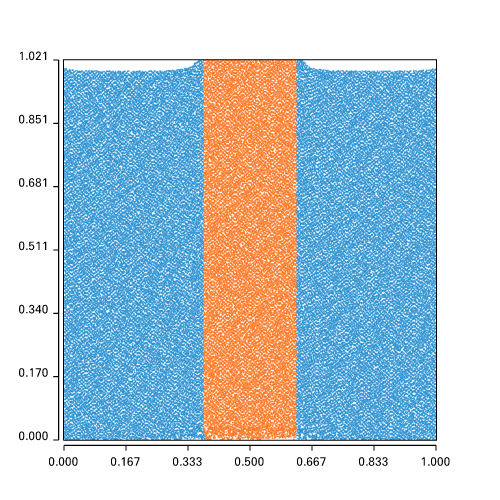

In [10]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.show()
    Fig.save("ModelResult_finalstep_light.png")


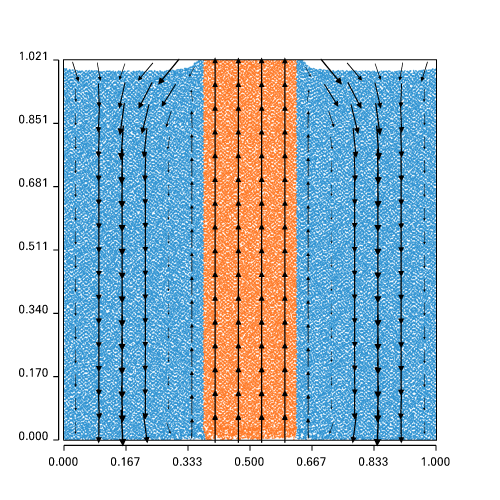

In [11]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_light_mesh.png")

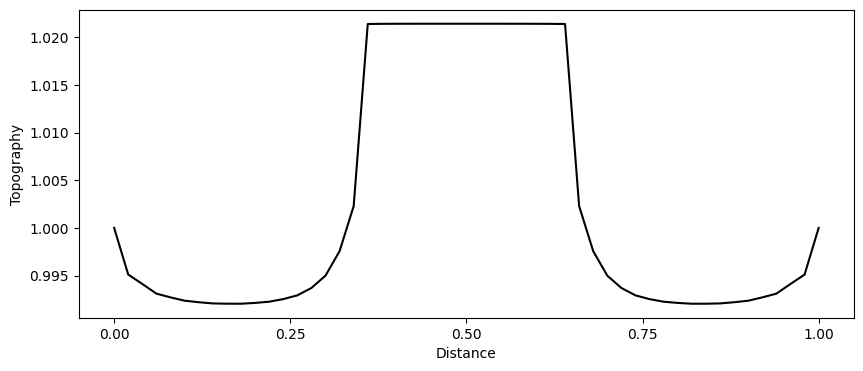

In [12]:
coords = Model.mesh.data[Model.top_wall]
xlim = [0.,0.25,0.5,0.75,1]


import matplotlib.pyplot as plt

Fig, ax1,  = plt.subplots(1,1,figsize=(10,4))

#ax1.set_title("Pressure at bottom")
ax1.set_xlabel('Distance')
ax1.set_ylabel('Topography')
ax1.set_xticks(xlim)

ax1.plot(coords[:,0],coords[:,1],'-', color = 'black')

#ax1.legend(loc='lower right')
#plt.savefig(Model.outputDir+"/Vel-{0}.png".format(Model.checkpointID))


In [13]:
coords[:,1].mean()

1.0021449158862861

In [14]:
1/0.95*0.25+0.75

1.013157894736842

In [15]:
Model.velocityField.evaluate(Model.bottom_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [ -6.48491332e-06,  -2.00222999e-05],
       [ -1.08204737e-05,  -3.06057650e-05],
       [ -1.06742684e-05,  -4.20130697e-05],
       [ -9.32772635e-06,  -5.04836162e-05],
       [ -6.80628360e-06,  -5.73729575e-05],
       [ -3.29944718e-06,  -6.20342687e-05],
       [  4.26565635e-07,  -6.46683826e-05],
       [  4.73090333e-06,  -6.51712377e-05],
       [  8.78263140e-06,  -6.35374294e-05],
       [  1.29729179e-05,  -5.97702073e-05],
       [  1.64951914e-05,  -5.38800755e-05],
       [  1.97210924e-05,  -4.58555972e-05],
       [  2.17596960e-05,  -3.58352838e-05],
       [  2.30967792e-05,  -2.35372131e-05],
       [  2.21440940e-05,  -9.72206159e-06],
       [  2.03434067e-05,   7.41681871e-06],
       [  1.23473834e-05,   2.35126332e-05],
       [  1.79778585e-06,   5.34218003e-05],
       [ -5.20013739e-08,   5.52296126e-05],
       [ -3.91732983e-08,   5.52097617e-05],
       [ -4.29713685e-08,   5.52186956e-05],
       [ -

In [16]:
Model.velocityField.evaluate(Model.top_wall)

array([[  0.00000000e+00,   0.00000000e+00],
       [  1.04975651e-05,  -3.96826915e-05],
       [  1.57709430e-05,  -3.82480799e-05],
       [  1.14911447e-05,  -3.84997814e-05],
       [  9.60154248e-06,  -3.51343914e-05],
       [  4.25585450e-06,  -3.33967626e-05],
       [ -1.71291281e-07,  -3.14817739e-05],
       [ -6.16295515e-06,  -3.05644245e-05],
       [ -1.15655497e-05,  -3.00273898e-05],
       [ -1.76210483e-05,  -3.03251347e-05],
       [ -2.30738552e-05,  -3.12675334e-05],
       [ -2.84877261e-05,  -3.32902565e-05],
       [ -3.31360245e-05,  -3.63862614e-05],
       [ -3.67545466e-05,  -4.12889434e-05],
       [ -3.92306417e-05,  -4.76171590e-05],
       [ -3.77426908e-05,  -5.63231330e-05],
       [ -3.22640018e-05,  -6.14657045e-05],
       [ -1.15686026e-05,  -5.83761887e-05],
       [ -2.05825490e-07,   5.45410743e-05],
       [ -1.43159342e-07,   5.47255888e-05],
       [ -1.15951730e-07,   5.47636185e-05],
       [ -9.07412956e-08,   5.47825057e-05],
       [ -


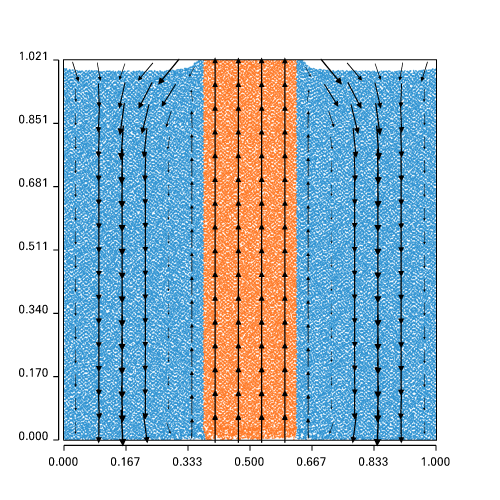

In [17]:
if uw.mpi.rank == 0:
    from underworld import visualisation as vis
    fig_res = (500,500)

    Fig = vis.Figure(resolution=fig_res,rulers=True,margin = 60,rulerticks=7,quality=3,clipmap=False)
    Fig.Points(Model.swarm, Model.materialField,fn_size=2.0,discrete=True,colourBar=False)
    Fig.VectorArrows(Model.mesh, Model.velocityField) 
    #Fig.Mesh(Model.mesh)
    Fig.show()
    Fig.save("ModelResult_finalstep_dense_mesh.png")